# Climate summary tutorial with the Protocol - Python tool

This notebook tutorial shows how to generate a climate summary for the variables: significant wave height ($H_{m0}$), Peak period ($T_{p}$), Mean wave direction ($Dir_{Wv}$), Wind velocity ($Vel_{Wd}$) and Mean wind direction ($Dir_{Wd}$)

In [1]:
# Python 2/3 setup 
from __future__ import (absolute_import, division, print_function, unicode_literals)
# from builtins import *

In [2]:
# Juypyter setup

%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Import Packages

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from climate import read
from climate import summary

In [4]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 5)

## Read SIMAR file

This function read the SIMAR file

In [5]:
data_file = 'SIMAR_1052046'
full_data_path = os.path.join('..', '..', '..', '..', 'data', 'simar')

In [6]:
data_simar, code = read.simar(data_file, path=full_data_path)

In [7]:
data_simar

,Hm0,Tp,DirM,VelV,DirV
AA_MM_DD_HH,,,,,
1958-01-04 00:00:00,2.1,10.8,249.0,7.9,172.0
1958-01-04 01:00:00,2.1,10.6,250.0,7.5,170.0
1958-01-04 02:00:00,2.1,10.6,251.0,7.1,169.0
1958-01-04 03:00:00,2.1,10.6,252.0,6.7,167.0
1958-01-04 04:00:00,2.1,10.6,253.0,6.3,162.0
...,...,...,...,...,...
2017-08-06 20:00:00,0.6,9.7,287.0,4.2,301.0
2017-08-06 21:00:00,0.6,9.7,286.0,4.1,288.0
2017-08-06 22:00:00,0.6,9.7,286.0,3.1,269.0


## Example of QSS: Quick SIMAR Summary 

This function (of pandas) generates a quick summary of the different variables included in your data

In [8]:
data_summary = summary.get_summary(data_simar)

In [9]:
data_summary    

,Hm0,Tp,DirM,VelV,DirV
count,520976.000000,520976.000000,520976.000000,520976.000000,520976.000000
mean,1.036288,8.109552,242.829821,5.982445,200.317431
std,0.708980,3.095294,67.704083,2.968212,108.772285
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,5.200000,228.000000,3.800000,98.000000
50%,0.900000,8.100000,275.000000,5.700000,233.000000
75%,1.300000,10.400000,283.000000,7.800000,295.000000
max,8.200000,20.900000,360.000000,25.000000,360.000000


## Plotting time series of linear variables (i.e Significant wave height)

This function plots the time series of a choosen linear variable

In [10]:
variable = 'Hm0'
title_label = 'Significan wave heigh'
ylabel = '$H_s$'
ylabel_unit = 'm'
fig_x_size = 20
fig_y_size = 10

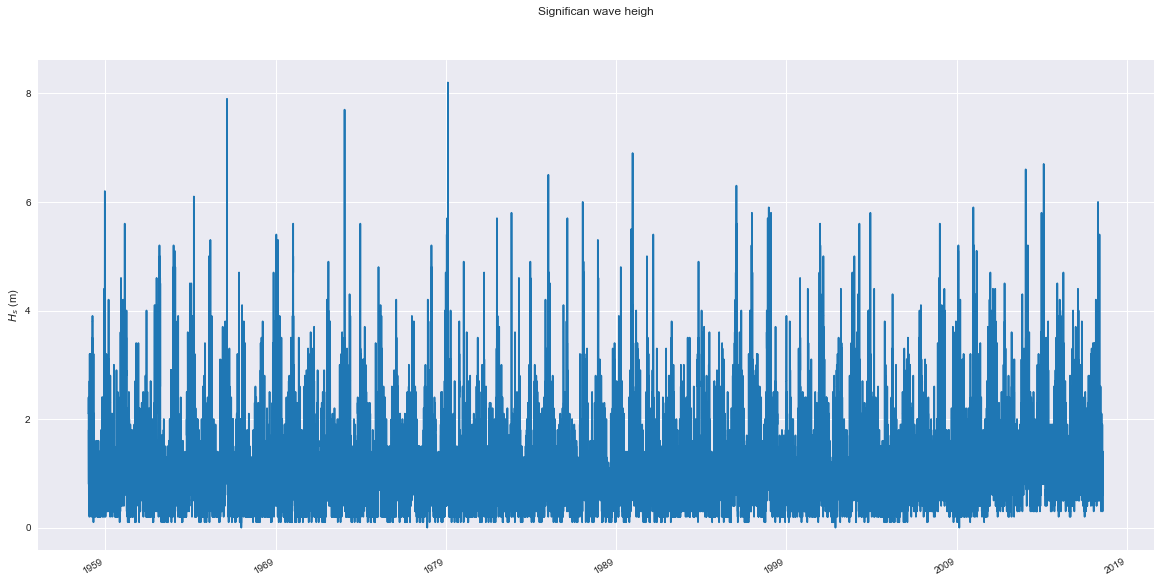

In [11]:
plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_series(data_simar, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit)

## Plotting time series of linear variables in a specific period of time (i.e Peak period between 2015 & 2017)

This function plots the time series of a choosen linear variable in a specific period of time

In [12]:
initial_date = '2015-01-01'
final_date = '2018-01-01'

variable = 'Tp'
title_label = 'Peak period'
ylabel = '$T_p$'
ylabel_unit = 's'
fig_x_size = 20
fig_y_size = 10

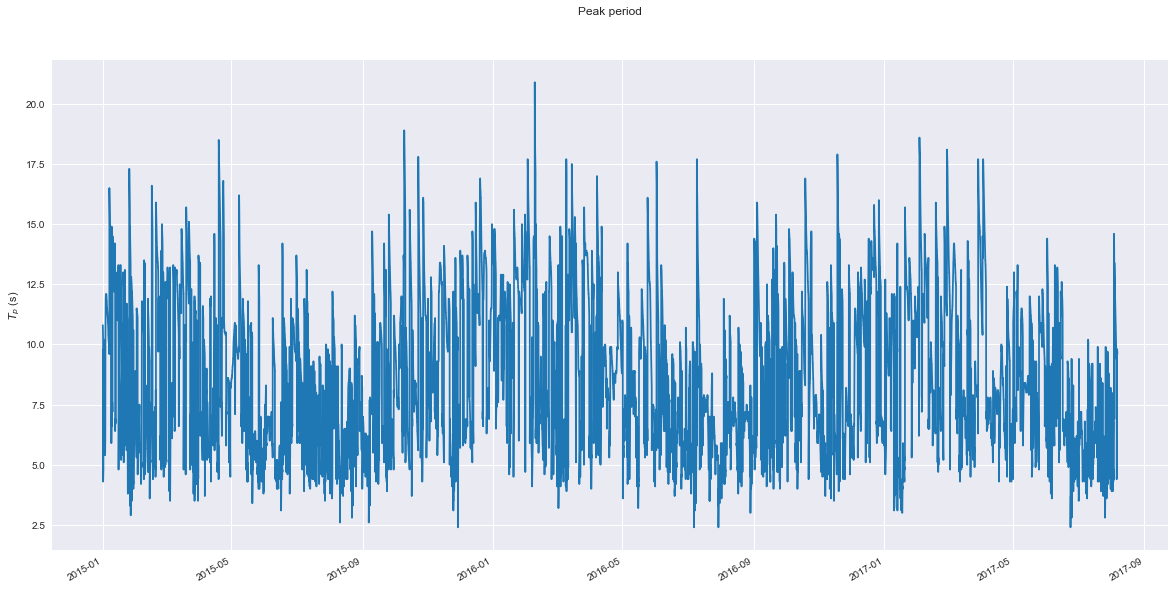

In [13]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_series(data_simar_year, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit)

## Plotting time series of circular variables in a specific period of time (i.e Mean wave direction between 2015 & 2017)

This function plots the time series of a choosen circular variable in a specific period of time

In [14]:
initial_date = '2016-01-01'
final_date = '2018-01-01'

variable = 'DirM'
title_label = 'Mean wave direction'
ylabel = '$Dir_Wv$'
ylabel_unit = 'º'
fig_x_size = 20
fig_y_size = 10

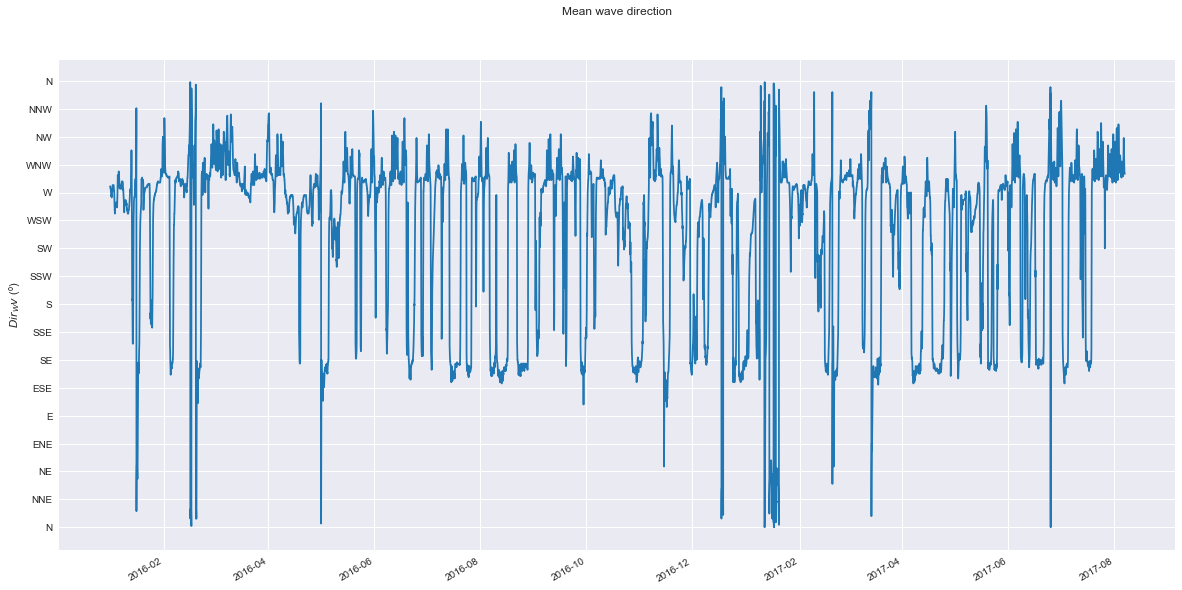

In [15]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_series(data_simar_year, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit, circular=True)

## Plotting trends (i.e. Significant wave height trend in 2016)

This function plots the trend of a choosen variable in a specific period of time

In [16]:
initial_date = '2016-01-01'
final_date = '2017-01-01'

variable = 'Hm0'
title_label = 'Significant wave height trend'
ylabel = '$H_s$'
ylabel_unit = 'm'
fig_x_size = 20
fig_y_size = 10

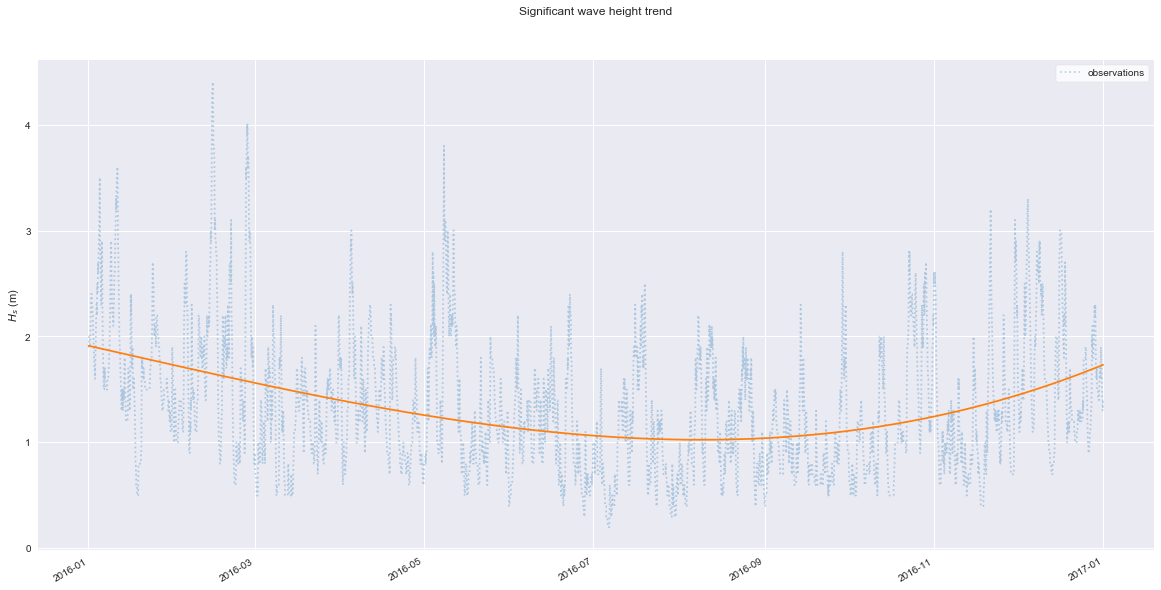

In [17]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size, fig_y_size))
summary.plot_series(data_simar_year, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit, show_trends=True)


## Plotting wave rose

This function plots the wave rose 

In [18]:
hs_column_label = 'Hm0'
dir_wv_column_label = 'DirM'
title_label = 'Wave rose'
label = '$H_s$'
label_unit = 'm'
fig_x_size = 20
fig_y_size = 10

C:\Users\GDFA-JUAN\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:52: RuntimeWarning: invalid value encountered in rint
  return getattr(obj, method)(*args, **kwds)


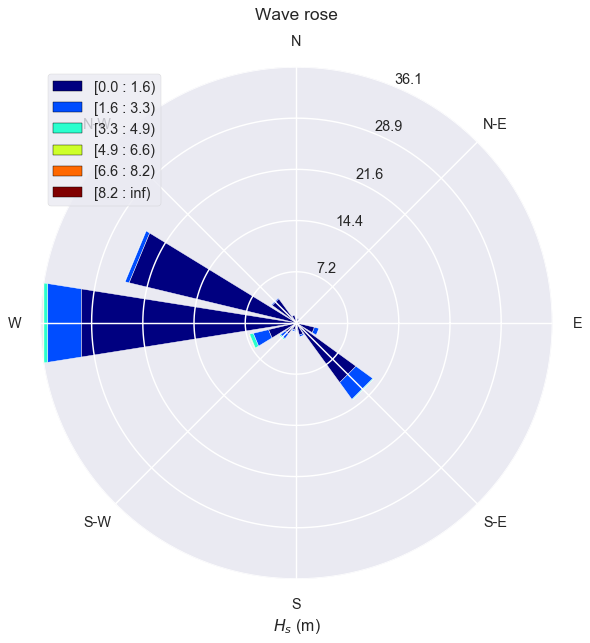

In [19]:
    plt.figure(figsize=(10,5))
    summary.plot_rose(data_simar, data_column=hs_column_label, dir_column=dir_wv_column_label , title=title_label, var_name=label, var_unit=label_unit)

## Plotting histogram and empirical density function of a choosen variable (i.e. Wind velocity)

This function plots the histogram and the empirical distribution function of a choosen variable in a specific period of time

In [20]:
initial_date = '1950-01-01'
final_date = '2017-01-01'

variable = 'VelV'
title_label = 'Histogram & Empirical density function'
ylabel = '$Vel_{wd}$'
ylabel_unit = 'm/s'
fig_x_size = 20
fig_y_size = 10

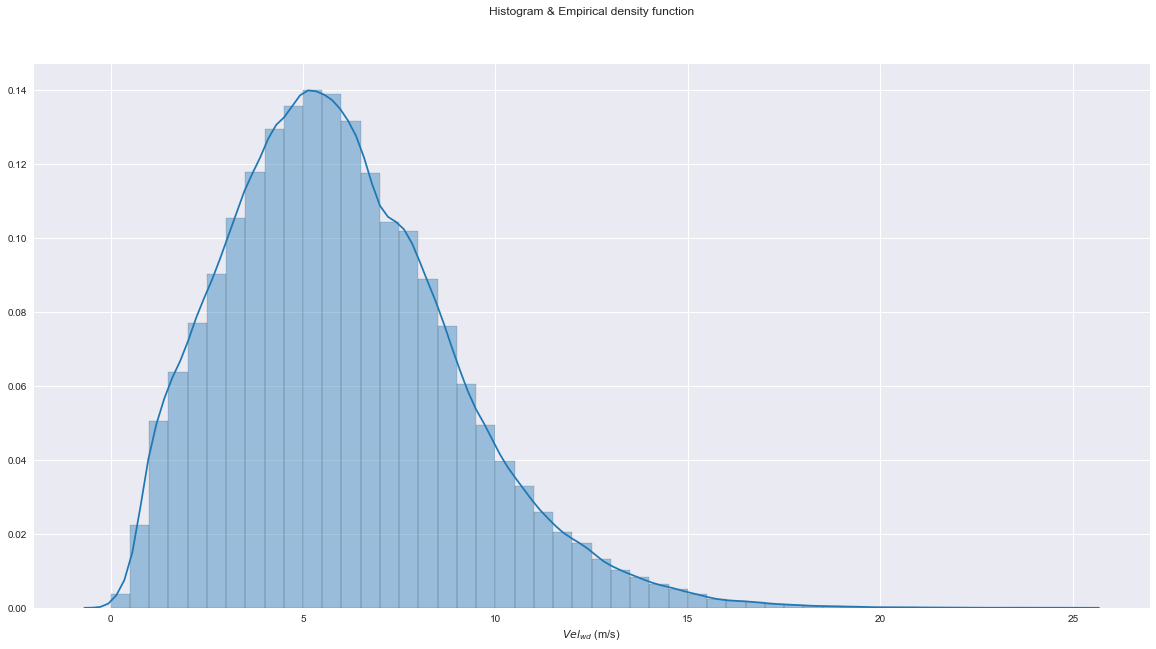

In [21]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_histogram(data_simar_year[variable], title=title_label, var_name=ylabel, var_unit=ylabel_unit, rug=False, kernel=True)

## Plotting histogram and empirical density function of a choosen circular variable (i.e. Mean wind direction)

This function plots the histogram and the empirical distribution function of a choosen circular variable in a specific period of time

In [22]:
initial_date = '1950-01-01'
final_date = '2017-01-01'

variable = 'DirV'
title_label = 'Histogram & Empirical density function'
ylabel = '$Dir_{wd}$'
ylabel_unit = '*'
fig_x_size = 20
fig_y_size = 10

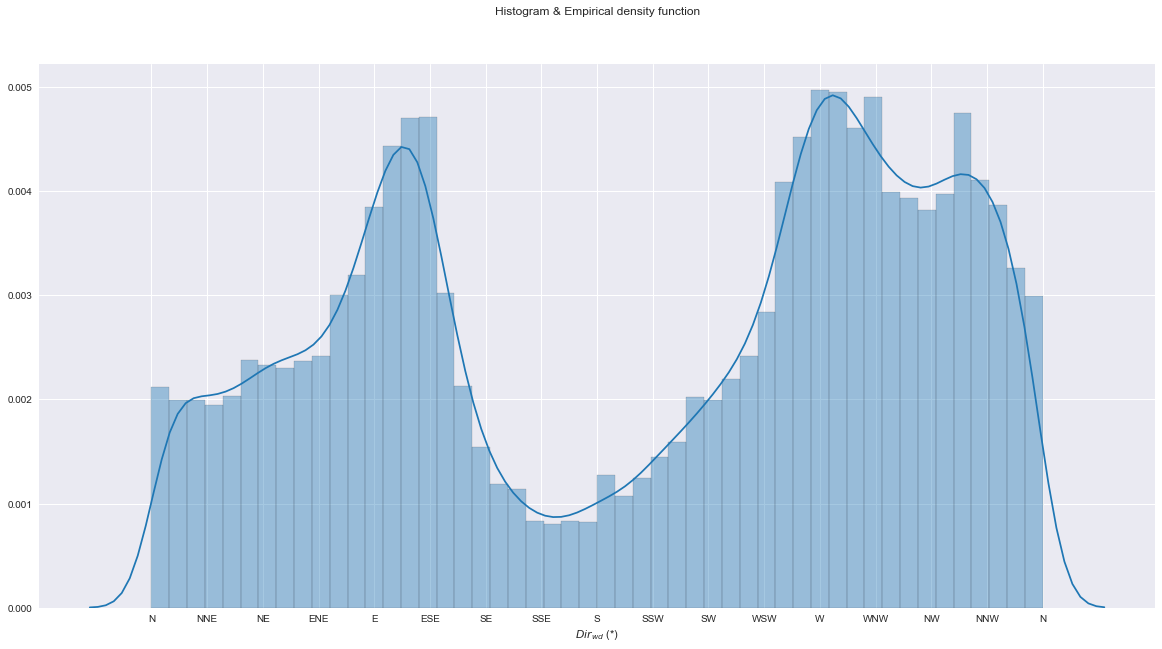

In [23]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_histogram(data_simar_year[variable], title=title_label, var_name=ylabel, var_unit=ylabel_unit, rug=False, circular=True, kernel=True)

## Plotting scatter distribution of two variables (i.e. Significant wave heigh and peak period)

This function represents a scatter plot of two different variables in a specific period of time

In [24]:
initial_date = '2000-01-01'
final_date = '2017-01-01'

x_var = 'Hm0'
y_var = 'Tp'
title_label = 'Scatter plot'
xlabel = '$H_s$'
xlabel_unit = 'm'
ylabel = '$T_{p}$'
ylabel_unit = 's'
fig_x_size = 20
fig_y_size = 10

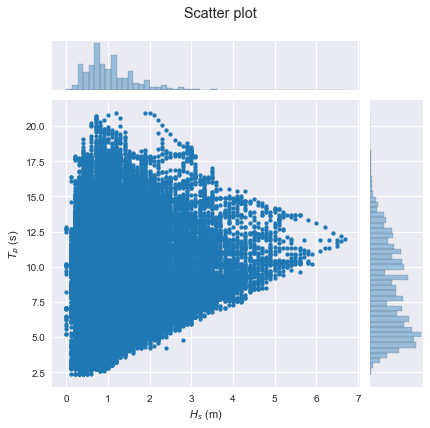

In [25]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]
    
plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_scatter(data_simar_year, x_var, y_var, title=title_label, x_var_name=xlabel, x_var_unit=xlabel_unit, y_var_name=ylabel, y_var_unit=ylabel_unit)


## Plotting scatter distribution of two variables (i.e. Wind velocity and mean wind direction)

In [26]:
initial_date = '2016-01-01'
final_date = '2017-01-01'

x_var = 'VelV'
y_var = 'DirV'
title_label = 'Scatter plot'
xlabel = '$Vel_{wd}$'
xlabel_unit = 'm/s'
ylabel = '$Dir_{wd}$'
ylabel_unit = 'º'
fig_x_size = 20
fig_y_size = 10

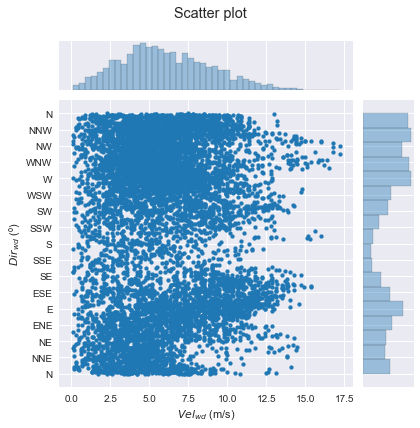

In [27]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]
    
plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_scatter(data_simar_year, x_var, y_var, title=title_label, x_var_name=xlabel, x_var_unit=xlabel_unit, y_var_name=ylabel, y_var_unit=ylabel_unit, circular='y')

## Plotting monthly variability of one linear variable in a specific period of time

In [28]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'Hm0'
frequency = 'month'
title_label = 'Monthly variability'
xlabel = '$H_{s}$'
xlabel_unit = 'm'
fig_x_size = 10
fig_y_size = 5

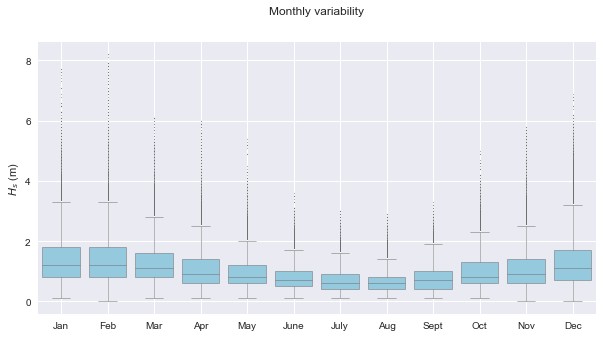

In [29]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(data_simar[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit)

## Plotting yearly variability of one linear variable in a specific period of time

In [30]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'Hm0'
frequency = 'year'
title_label = 'Yearly variability'
xlabel = '$H_{s}$'
xlabel_unit = 'm'
fig_x_size = 50
fig_y_size = 10

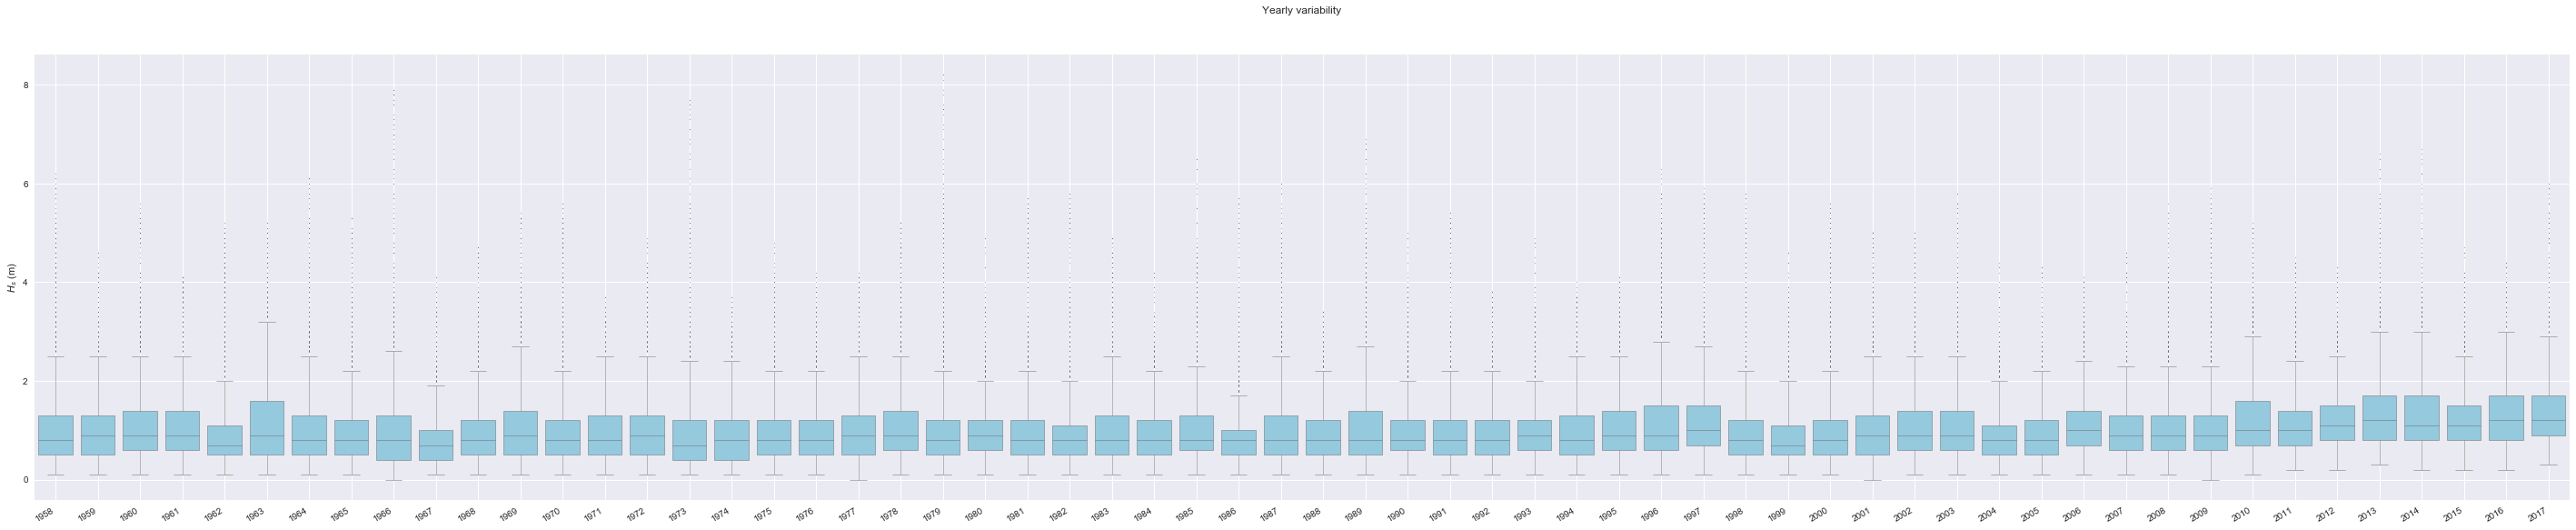

In [31]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(data_simar[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit)

## Plotting monthly variability of one circular variable in a specific period of time



In [32]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'DirM'
frequency = 'month'
title_label = 'Monthly variability'
xlabel = '$Dir_{wv}$'
xlabel_unit = 'º'
fig_x_size = 10
fig_y_size = 5

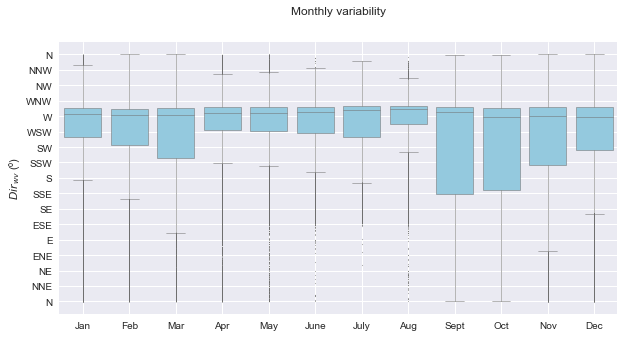

In [33]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(data_simar[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit, circular=True)

## Plotting yearly variability of one linear variable in a specific period of time

In [34]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'DirM'
frequency = 'year'
title_label = 'Yearly variability'
xlabel = '$Dir_{wv}$'
xlabel_unit = 'º'
fig_x_size = 50
fig_y_size = 10

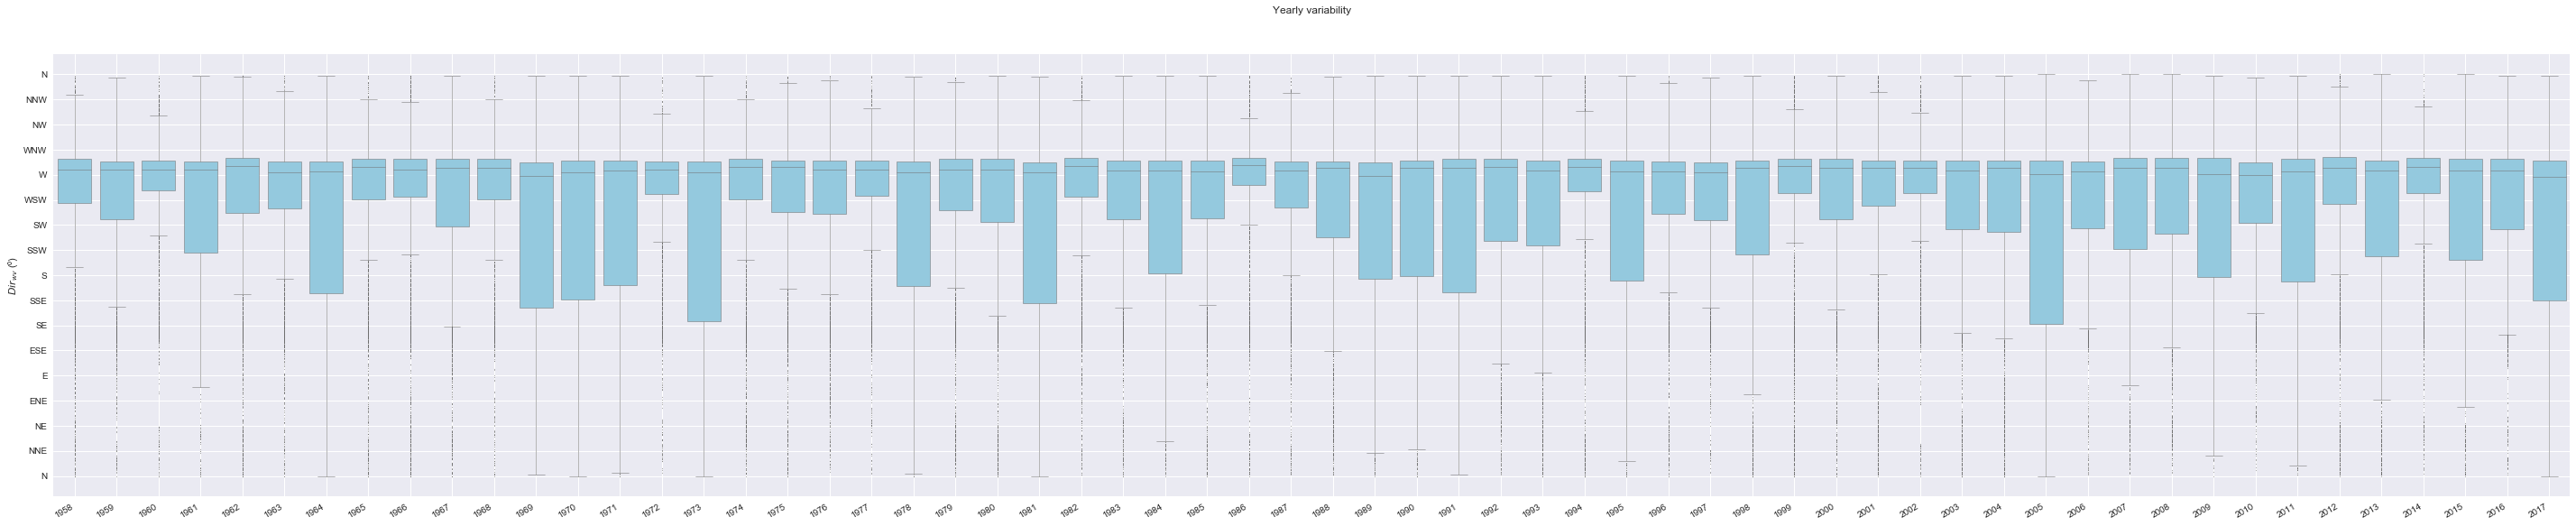

In [35]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(data_simar[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit, circular=True)